In [ ]:

# Titanic Dataset - Exploratory Data Analysis (EDA)

## Executive Summary
This project performs Exploratory Data Analysis (EDA) on the Titanic dataset. 
Using Python libraries like Pandas, Matplotlib, and Seaborn, we explored passenger demographics, survival distributions, 
and relationships between various features. Key insights include higher survival rates among females, passengers from 1st class, and children. 
Feature engineering such as family size and extracted titles further revealed patterns influencing survival. 
The analysis concludes that socio-economic status, age, and gender played major roles in survival outcomes.


In [ ]:

## Table of Contents
- [1. Introduction](#introduction)
- [2. Data Overview](#data-overview)
- [3. Missing Values](#missing-values)
- [4. Feature Engineering](#feature-engineering)
- [5. Univariate Analysis](#univariate-analysis)
- [6. Bivariate Analysis](#bivariate-analysis)
- [7. Correlation Heatmap](#correlation-heatmap)
- [8. Advanced Visualizations](#advanced-visualizations)
- [9. Outlier Detection](#outlier-detection)
- [10. Summary Table](#summary-table)
- [11. Observations](#observations)
- [12. Final Summary](#final-summary)



--- HEAD ---

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

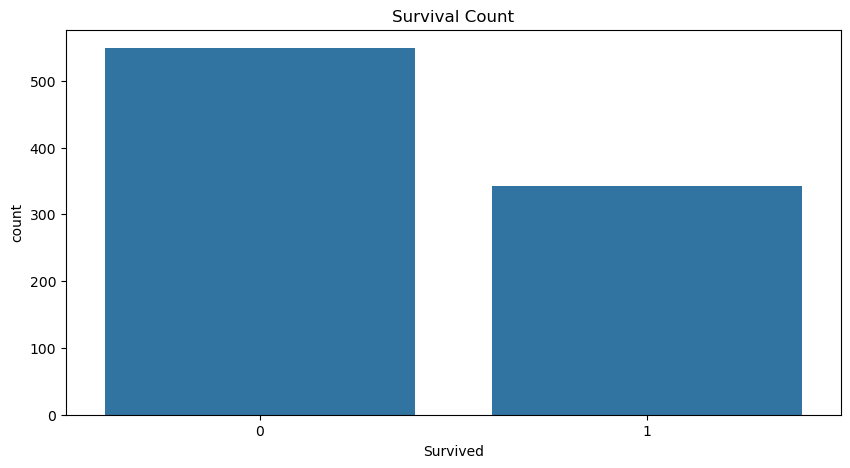

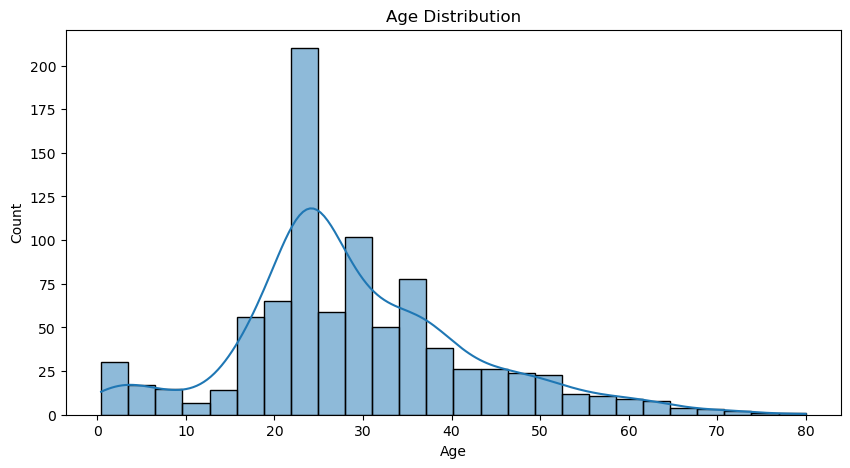

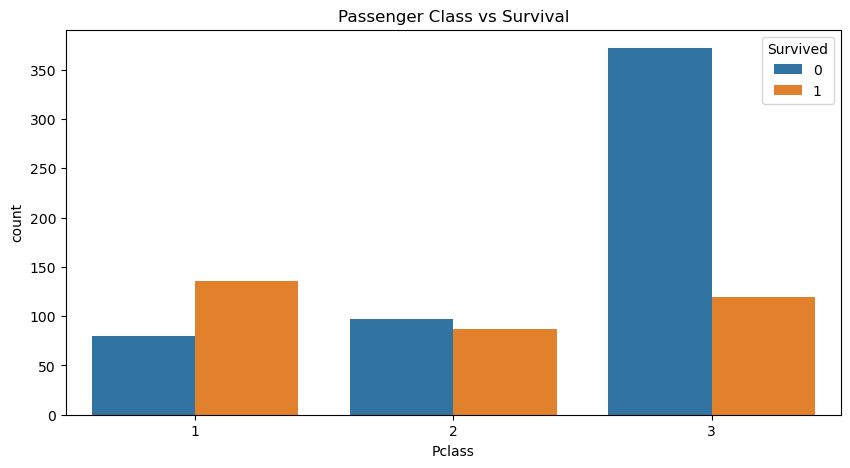

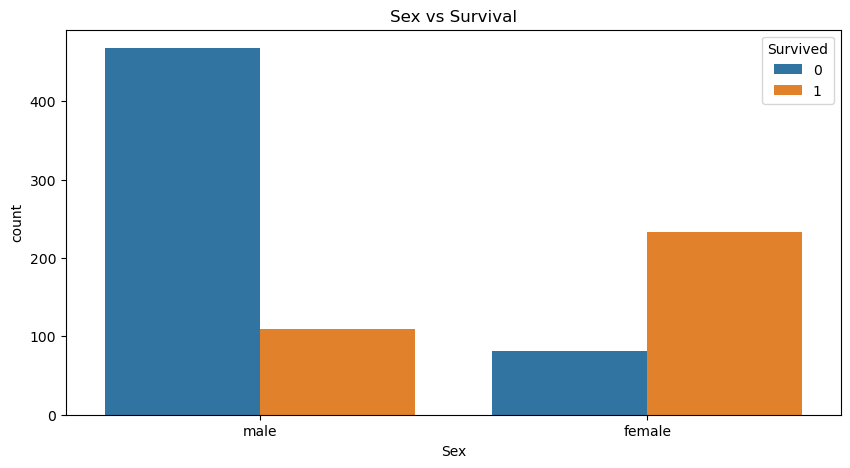

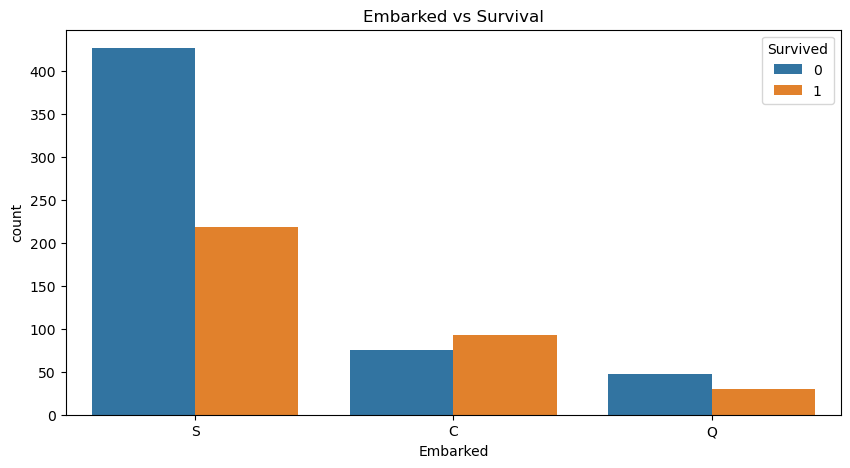

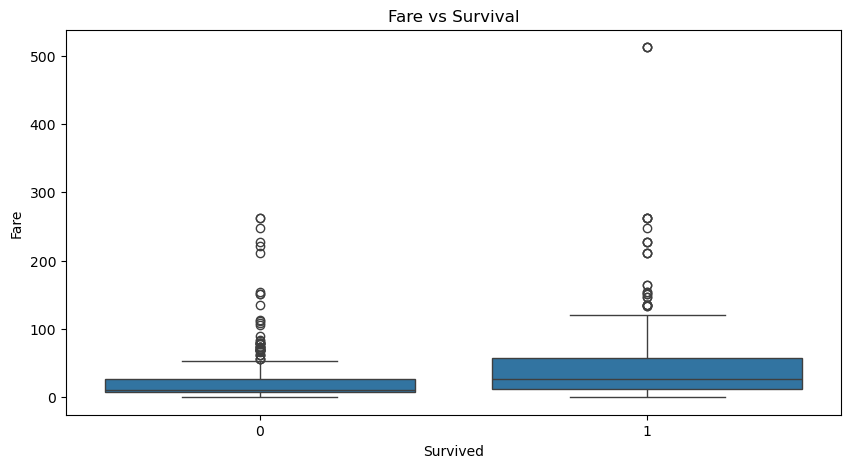

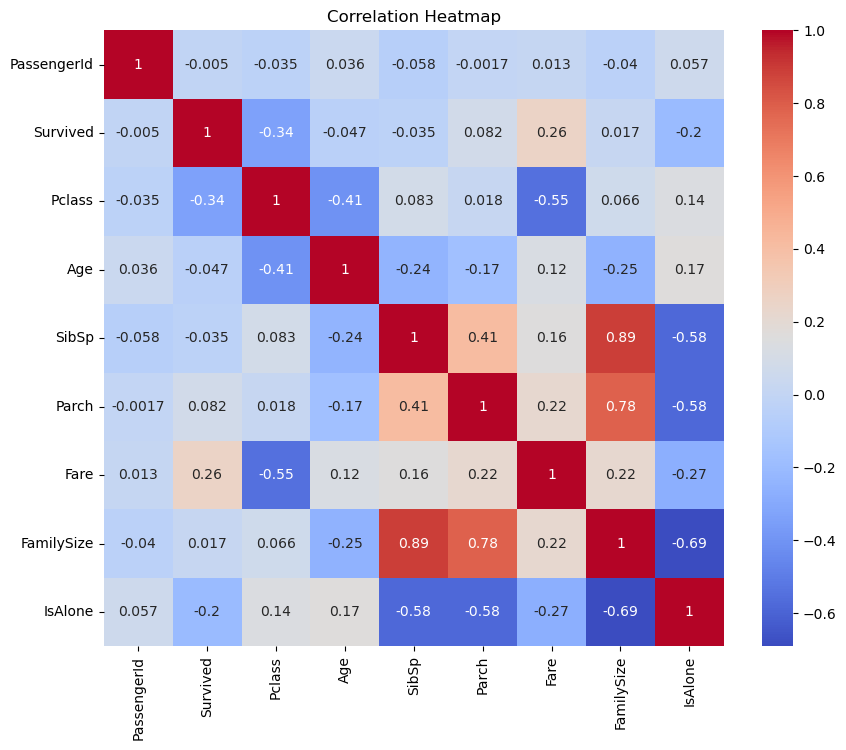

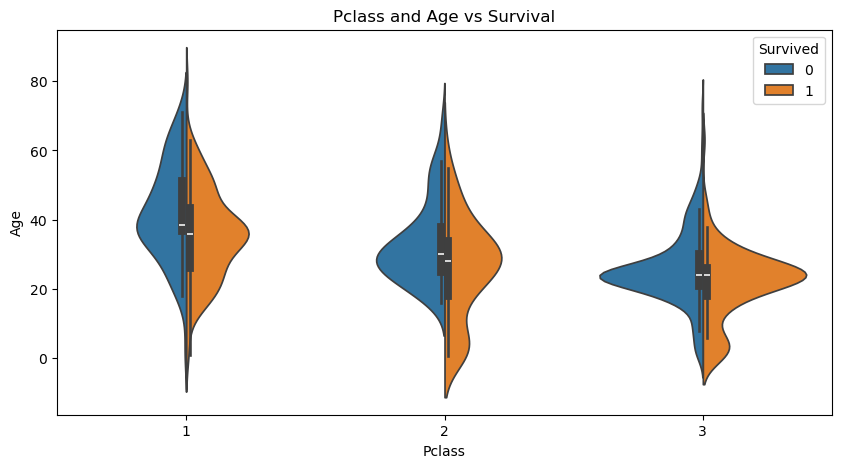

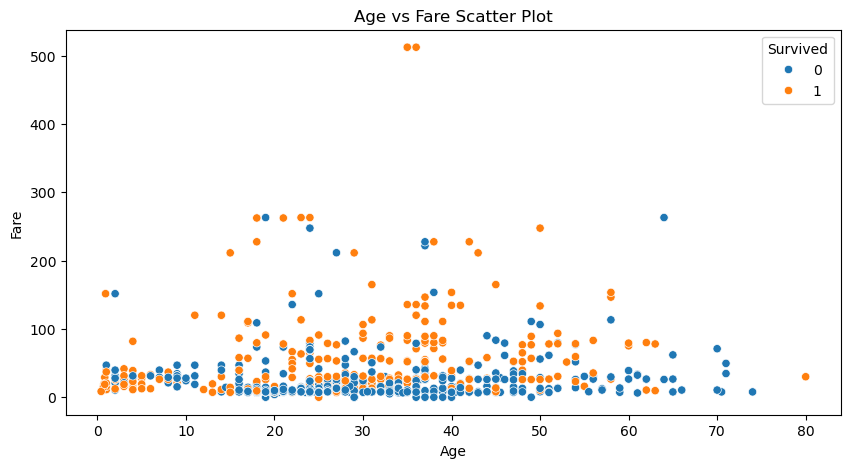

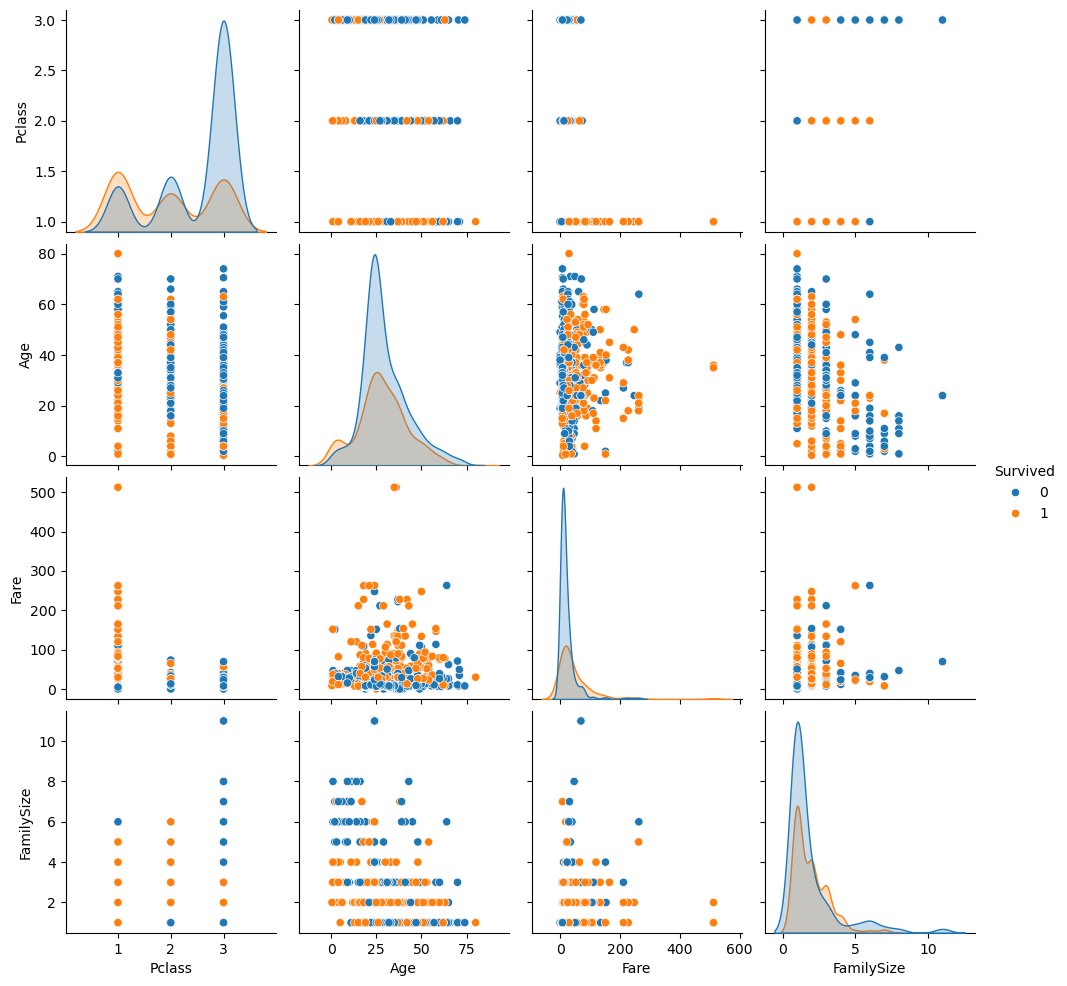

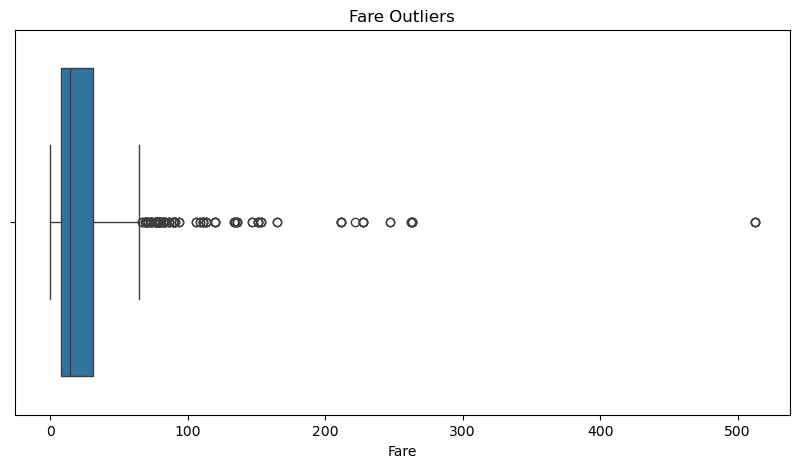

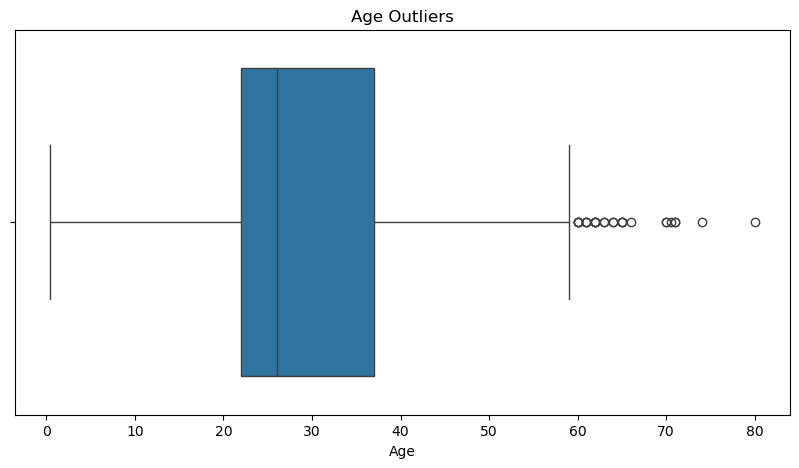


--- SUMMARY TABLE ---

      Feature                               Key Insight
0         Sex                     Females survived more
1      Pclass             1st class had better survival
2         Age     Children had slightly better survival
3        Fare      Higher fare passengers survived more
4    Embarked       Embarked from C had higher survival
5  FamilySize  Large families had less survival chances
6       Title  Certain titles (e.g., Mrs) survived more

--- OBSERVATIONS ---

- Most passengers did not survive.
- Females had a higher survival rate than males.
- Passengers in 1st class had higher survival rates.
- Younger passengers (especially children) had better chances.
- Fare prices and Embarked port also impacted survival.
- Passengers traveling alone were less likely to survive.

--- FINAL SUMMARY ---

Survival was highly influenced by gender, class, age, fare, and family connections. New features like FamilySize and Title improved understanding of survival factors.


In [5]:
# 1. Introduction
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv('train.csv')  # Change path if needed

# 2. Data Overview
print("\n--- HEAD ---\n")
print(df.head())

print("\n--- INFO ---\n")
print(df.info())

print("\n--- DESCRIBE ---\n")
print(df.describe())

print("\n--- VALUE COUNTS (Survived) ---\n")
print(df['Survived'].value_counts())

# 3. Missing Values
print("\n--- MISSING VALUES ---\n")
print(df.isnull().sum())

# 4. Feature Engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = 1  # Default is alone
df.loc[df['FamilySize'] > 1, 'IsAlone'] = 0  # If family size > 1, not alone
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Fill missing values
df['Age'] = df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'))
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# 5. Univariate Analysis
plt.figure(figsize=(10,5))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# 6. Bivariate Analysis
plt.figure(figsize=(10,5))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Passenger Class vs Survival')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Sex vs Survival')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Embarked vs Survival')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.show()

# 7. Correlation Heatmap (fixed)
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 8. Advanced Visualizations
plt.figure(figsize=(10,5))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)
plt.title('Pclass and Age vs Survival')
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Age vs Fare Scatter Plot')
plt.show()

sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize']], hue='Survived')
plt.show()

# 9. Outlier Detection
plt.figure(figsize=(10,5))
sns.boxplot(x='Fare', data=df)
plt.title('Fare Outliers')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='Age', data=df)
plt.title('Age Outliers')
plt.show()

# 10. Summary Table
summary = pd.DataFrame({
    'Feature': ['Sex', 'Pclass', 'Age', 'Fare', 'Embarked', 'FamilySize', 'Title'],
    'Key Insight': [
        'Females survived more',
        '1st class had better survival',
        'Children had slightly better survival',
        'Higher fare passengers survived more',
        'Embarked from C had higher survival',
        'Large families had less survival chances',
        'Certain titles (e.g., Mrs) survived more'
    ]
})

print("\n--- SUMMARY TABLE ---\n")
print(summary)

# 11. Observations
print("\n--- OBSERVATIONS ---\n")
print("- Most passengers did not survive.")
print("- Females had a higher survival rate than males.")
print("- Passengers in 1st class had higher survival rates.")
print("- Younger passengers (especially children) had better chances.")
print("- Fare prices and Embarked port also impacted survival.")
print("- Passengers traveling alone were less likely to survive.")

# 12. Final Summary
print("\n--- FINAL SUMMARY ---\n")
print("Survival was highly influenced by gender, class, age, fare, and family connections. New features like FamilySize and Title improved understanding of survival factors.")